In [2]:
import numpy as np
import json

In [2]:
topics = np.load("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/topics.npy", )
generations = np.load("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/generations.npy")

with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores.json", "r") as f:
    factscores = json.load(f)

In [39]:
factscores.keys()

dict_keys(['score', 'respond_ratio', 'decisions', 'num_facts_per_response', 'init_score'])

In [3]:
factscores['init_score']

0.3323809523809524

In [4]:
factscores["decisions"]

[[{'atom': 'Dead Child is a band.', 'is_supported': True},
  {'atom': 'Dead Child is a hardcore punk band.', 'is_supported': False},
  {'atom': 'Dead Child is a hardcore punk band from Tampa, Florida.',
   'is_supported': False}],
 [{'atom': 'Velusami Radhakrishnan is a politician.', 'is_supported': True},
  {'atom': 'Velusami Radhakrishnan is from Sri Lanka.', 'is_supported': True},
  {'atom': 'Velusami Radhakrishnan is a member of the Sri Lankan Parliament.',
   'is_supported': True}],
 [{'atom': 'Gentian Stojku is Macedonian.', 'is_supported': False},
  {'atom': 'Gentian Stojku is retired.', 'is_supported': True},
  {'atom': 'Gentian Stojku was a footballer.', 'is_supported': True},
  {'atom': 'Gentian Stojku played as a forward.', 'is_supported': False}],
 [{'atom': 'Diego Herner is a footballer.', 'is_supported': True},
  {'atom': 'Diego Herner is Chilean.', 'is_supported': False}],
 [{'atom': 'Mbali Ntuli is an Italian rugby union player.',
   'is_supported': False},
  {'atom': '

In [41]:
factscores["decisions"][67]

[{'atom': 'Louis Eilshemius was an American painter.', 'is_supported': True},
 {'atom': 'Louis Eilshemius was among the first generation of American modernists.',
  'is_supported': False}]

In [14]:
ratio_correct_all = []

num_correct_all = []

for j in range(len(factscores["decisions"])):
    if (factscores["decisions"][j])!=None:
        ratio_correct = np.mean([factscores["decisions"][j][i]["is_supported"] for i in range(len(factscores["decisions"][j]))])
        ratio_correct_all.append(ratio_correct)

        num_correct = np.sum([factscores["decisions"][j][i]["is_supported"] for i in range(len(factscores["decisions"][j]))])
        num_correct_all.append(num_correct)

        if num_correct>=4:
            print(j)

40
60
64
83


In [18]:
factscores["decisions"][83]

[{'atom': 'Roland Winters was an American actor.', 'is_supported': True},
 {'atom': 'Roland Winters was best known for his performances.',
  'is_supported': True},
 {'atom': 'Roland Winters had extensive performances.', 'is_supported': True},
 {'atom': 'Roland Winters had prolific performances.', 'is_supported': True},
 {'atom': 'Roland Winters had performances in American television series.',
  'is_supported': True},
 {'atom': 'Roland Winters had performances in American television series in the 1950s.',
  'is_supported': False},
 {'atom': 'Roland Winters had performances in American television series in the 1960s.',
  'is_supported': True}]

(array([36., 34., 20.,  6.,  3.,  1.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

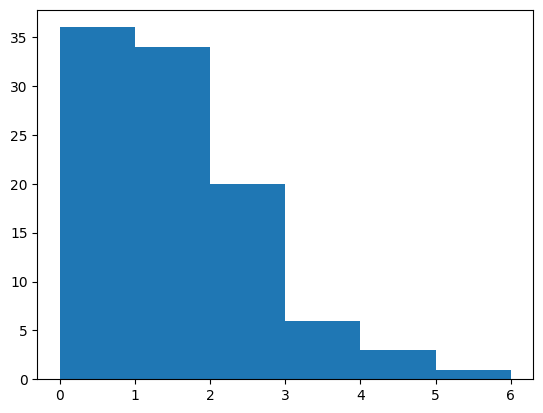

In [12]:
import matplotlib.pyplot as plt
plt.hist(num_correct_all, bins=np.array([0, 1, 2, 3, 4, 5, 6]))

In [11]:
factscores['init_score']

0.2858769841269841

In [20]:
len(np.load("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/generations.npy"))

100

In [22]:
len(np.load("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/output_strings_train.npy"))

104539

In [24]:
5000/100*1.7

85.0

In [3]:
with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores_test_small.json", "r") as f:
    factscores = json.load(f)

num_true_all = []
num_total_all = []
skipped_idxs = []
for i in range(len(factscores["decisions"])):
    decison = factscores["decisions"][i]
    if decison == None:
        skipped_idxs.append(i)
    else:
        num_total_all.append(len(decison))
        num_true_all.append(np.sum([fact["is_supported"] for fact in decison]))

(array([ 0.,  1., 30., 55.,  9.,  5.,  0.,  0.,  0.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

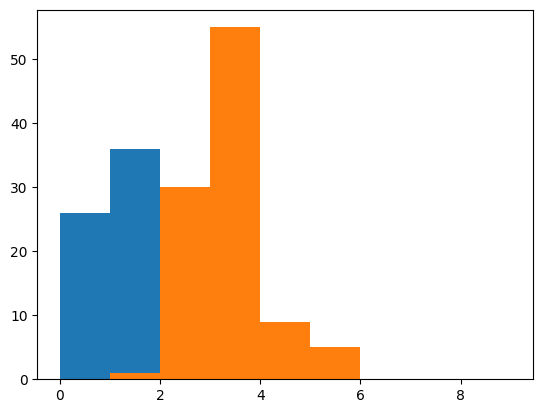

In [6]:
import matplotlib.pyplot as plt
plt.hist(num_true_all, bins=np.arange(0, 10, 1))
plt.hist(num_total_all, bins=np.arange(0, 10, 1))

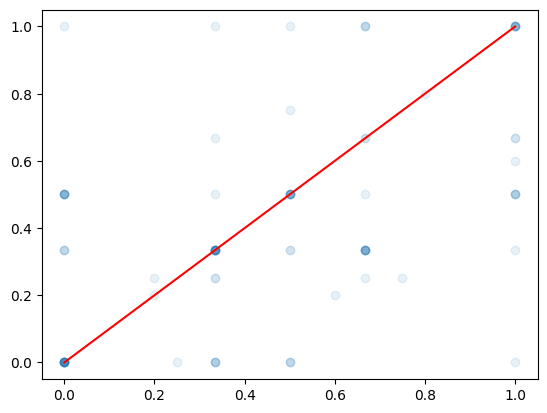

In [30]:
# plt.scatter(num_total_all, (pred_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1), alpha=0.5)

# plt.scatter(num_true_all, pred_zero_to_six_probs.argmax(axis=1), alpha=0.1)

plt.scatter(np.array(num_true_all)/np.array(num_total_all), pred_num_correct_zero_to_six_probs.argmax(axis=1)/pred_num_total_zero_to_six_probs.argmax(axis=1), alpha=0.1)


plt.plot([0, 1], [0, 1], color="red")

In [54]:
num_correct = np.tile([0, 1, 2, 3, 4, 5, 6], (6, 1))
num_total = np.tile([1, 2, 3, 4, 5, 6], (7, 1)).transpose()

ratios = num_correct/num_total

pred_ratio = []
for i in range(len(pred_num_correct_zero_to_six_probs)):
    num_correct_probs = np.tile(pred_num_correct_zero_to_six_probs[i], (6, 1))
    num_total_probs = np.tile(pred_num_total_zero_to_six_probs[i, 1:], (7, 1)).transpose()

    ratios_probs = num_correct_probs*num_total_probs

    pred_ratio.append(np.sum(ratios_probs*ratios))

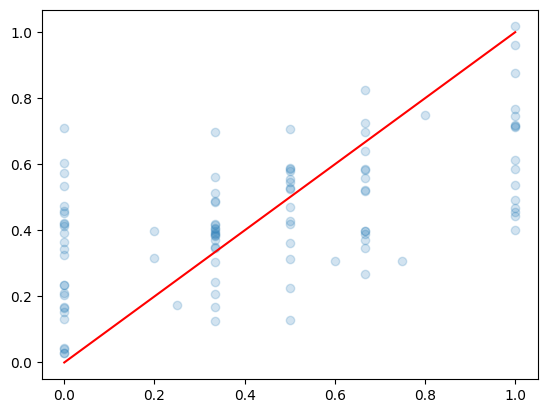

In [59]:
plt.scatter(np.array(num_true_all)/np.array(num_total_all), pred_ratio, alpha=0.2)

plt.plot([0, 1], [0, 1], color="red")


In [27]:
model_path = "ckpts/rm2_bios_llama7B_3/checkpoint_05000/hf_model"

pred_num_correct_zero_to_six_probs = np.load(model_path+"/test_small_num_correct_zero_to_six_probs.npy")


pred_num_total_zero_to_six_probs = np.load(model_path+"/test_small_num_total_zero_to_six_probs.npy")



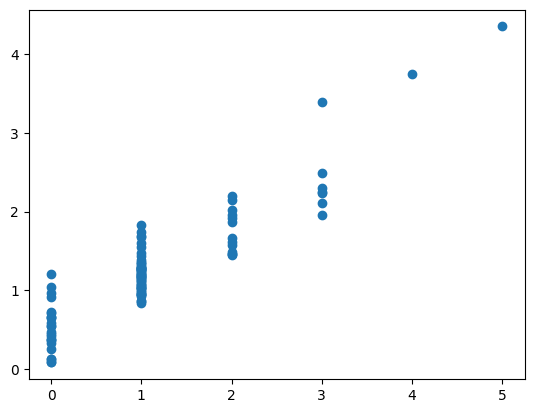

In [17]:
pred_zero_to_six_probs.argmax(axis=1)
pred_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]

plt.scatter(pred_zero_to_six_probs.argmax(axis=1), (pred_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1)
)


In [16]:
(pred_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1)


array([1.20707902, 0.5792382 , 1.43557539, 1.02940848, 1.21716095,
       1.06689328, 2.24490392, 0.64840269, 0.47532591, 1.01819743,
       0.25607983, 1.39144146, 1.36216171, 1.26604947, 0.95518583,
       0.09138139, 1.12957737, 0.13169601, 1.14732439, 0.944233  ,
       1.17666747, 1.34558323, 1.16706269, 1.55306523, 1.18041772,
       1.25157744, 1.28787408, 1.10620843, 1.06336706, 1.95759403,
       0.92979427, 0.95656025, 0.99391408, 0.95774843, 1.60732572,
       0.86335972, 1.92192932, 0.91852533, 0.72797377, 0.37167783,
       2.19714592, 1.21385956, 2.24093266, 0.97815174, 1.46809262,
       2.11499593, 1.48919093, 1.74388966, 1.07976277, 0.54631844,
       1.82468329, 3.39640048, 1.16688543, 1.61338345, 0.12804701,
       2.01667242, 1.30753859, 1.58001108, 4.35171491, 1.20426187,
       1.1518492 , 1.47703184, 1.46295062, 1.24655635, 1.69555576,
       1.04277139, 0.85959276, 2.48518259, 0.66540586, 1.2793804 ,
       1.29146156, 0.54164793, 1.03987492, 0.38150245, 2.14193

In [65]:
np.save( "biographies/test_points_medium.npy", np.load("biographies/test_points.npy")[:5000],)